In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

from luwiji.knn import illustration
from jcopml.tuning import grid_search_params as gsp
from jcopml.pipeline import num_pipe, cat_pipe

# Always Start with a simple model

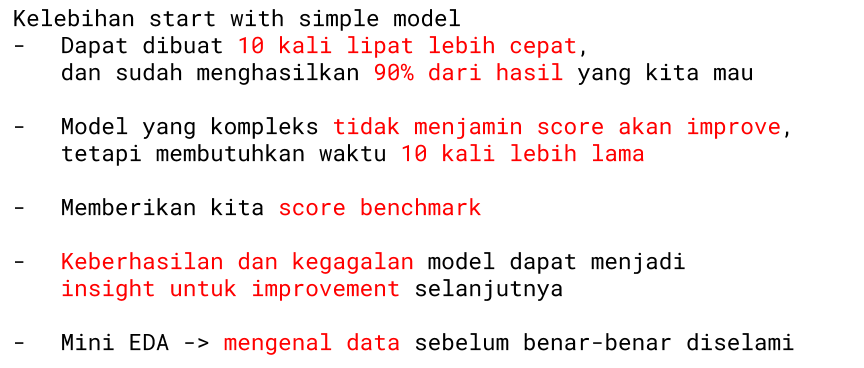

In [3]:
illustration.simple_model_advantage

### Don't take my words

```
The exact same approach of starting with a very simple model can be applied to machine learning engineering, and it usually proves very valuable. In fact, after seeing hundreds of projects go from ideation to finished products at Insight, we found that starting with a simple model as a baseline consistently led to a better end product.

    - Emmanuel Ameisen, Head of AI at Insight Data Science
```

### Baseline and Benchmark

Cara paling simple untuk mendapatkan baseline adalah menggunakan model yang paling simple seperti:
- random guessing
- threshold

Cara terbaik untuk mendapatkan benchmark adalah:
- Simple model
- Kompetisi

# Baseline

### Random Guessing

In [2]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")

X = df.drop(columns=['Survived'])
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
random_pred_train = np.random.choice([0, 1], size=len(y_train)) 
random_pred_test = np.random.choice([0, 1], size=len(y_test))

train_acc = accuracy_score(y_train, random_pred_train)
test_acc = accuracy_score(y_test, random_pred_test)
print(train_acc, test_acc)

0.5098314606741573 0.4748603351955307


### Threshold

In [6]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Semua women survive, semua male tidak survive

In [7]:
pred_train = X_train.Sex.map({"male": 0, "female": 1})
pred_test = X_test.Sex.map({"male": 0, "female": 1})

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print(train_acc, test_acc)

0.7893258426966292 0.776536312849162


# Benchmark

### Simple Model

simple model kita, tanpa EDA -> 78.7%

### Kaggle Competition

Coba pikirkan, banyak sekali hal yang masih bisa dicoba
- bagaimana kalau Age tidak kita bin ?
- bagaimana kalau kita tidak pakai Embarked ?
- bagaimana kalau kita pakai algoritma selain knn ?
- bagaimana kalau kita impute pakai mean, bukan median ?

Karena begitu banyaknya yang bisa dicoba, sistem kompetisi bisa mengumpulkan banyak orang dan model berbeda untuk solve suatu masalah yang kemudian model terbaiknya akan direward (biasanya uang)

https://www.kaggle.com/c/bluebook-for-bulldozers

Note for instructor:
- Overview: prize, description, evaluation, time
- Download data
- Kaggle Kernel & Discussion
- Public Leaderboard & Private Leaderboard: 
    - Overfit is a common problem
    - Leaderboard can help benchmark to avoid overfit

# You can learn a lot in Kaggle and be inspired

Our target is to beat 78.7%. Coba inspirasi dari kaggle -> fitur `title` dari `Name`.

In [8]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Ticket", 'Cabin'], inplace=True)

df["isAlone"] = (df.SibSp == 0) & (df.Parch == 0)
df.isAlone = df.isAlone.astype(int)

df.Age = pd.cut(df.Age, [0, 5, 12, 18, 40, 120], labels=["balita", "anak-anak", "remaja", "dewasa", "lansia"])
df.Fare = pd.cut(df.Fare, [0, 25, 100, 600], labels=["murah", "mahal", "eksklusif"])

### Extract feature -> title

In [9]:
tmp = "Braund, Mr. Owen Harris"
tmp.split(", ")[1].split(".")[0]

'Mr'

In [10]:
df["title"] = df.Name.apply(lambda x: (x.split(", ")[1]).split(".")[0])
df.drop(columns="Name", inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone,title
PassengerId,,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,0,Mr
2,1,1,female,dewasa,1,0,mahal,C,0,Mrs
3,1,3,female,dewasa,0,0,murah,S,1,Miss
4,1,1,female,dewasa,1,0,mahal,S,0,Mrs
5,0,3,male,dewasa,0,0,murah,S,1,Mr


In [11]:
df.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
Don               1
Sir               1
Mme               1
Capt              1
the Countess      1
Ms                1
Jonkheer          1
Name: title, dtype: int64

In [12]:
def modif_title(x):
    if x in ['Mr', 'Mrs', 'Miss', 'Master']:
        return x
    else:
        return "other"

In [13]:
df["title"] = df.title.apply(modif_title)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone,title
PassengerId,,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,0,Mr
2,1,1,female,dewasa,1,0,mahal,C,0,Mrs
3,1,3,female,dewasa,0,0,murah,S,1,Miss
4,1,1,female,dewasa,1,0,mahal,S,0,Mrs
5,0,3,male,dewasa,0,0,murah,S,1,Mr


# Dataset Splitting

In [14]:
X = df.drop(columns=['Survived'])
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

In [15]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), ['SibSp', 'Parch']),
    ('categoric', cat_pipe(encoder='onehot'), ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'isAlone', 'title'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s


{'algo__n_neighbors': 11, 'algo__p': 1.5, 'algo__weights': 'uniform'}
0.8455056179775281 0.8216619981325864 0.8044692737430168


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.8s finished


Nice, akhirnya kita bisa lebih dari 80%. Apakah masih bisa kita improve?

# So many things to try, but so little time we have

Itulah kenapa sistem crowd competition works very well, atau paling tidak kita perlu kerja dalam tim

# Contoh improvement lain -> binning Fare yang beda

In [16]:
# Import Data
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.drop(columns=["Ticket", 'Cabin'], inplace=True)

# Adding Feature
df["isAlone"] = (df.SibSp == 0) & (df.Parch == 0)

# Binning
df.Age = pd.cut(df.Age, [0, 5, 12, 18, 40, 120], labels=["balita", "anak-anak", "remaja", "dewasa", "lansia"])
df.Fare = pd.cut(df.Fare, [0, 25, 50, 75, 600], labels=["murah", "sedang", "mahal", "eksklusif"])

# Dataset Splitting
X = df.drop(columns=['Survived'])
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
 s
# Preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), ['SibSp', 'Parch']),
    ('categoric', cat_pipe(encoder='onehot'), ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'isAlone']),
])

# Training
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s


{'algo__n_neighbors': 9, 'algo__p': 1.5, 'algo__weights': 'distance'}
0.8778089887640449 0.8104043305085747 0.8324022346368715


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    1.9s finished


# dan tentu masih banyak lagi

kedepannya kita akan pelajari lebih jauh tentang:
- algoritma lain yang bisa kita coba (improvement melalui model)
- feature engineering lainnya yang bisa dicoba (improvement melalui data)